#  <span style ="color:black; background:orange">FILTRADO, IMPUTACIÓN Y VISUALIZACION DE LOS DATOS</span>
###  <span style ="color:black; background:orange">Se recomienda ir ejecutando una por una las celdas para una CORRECTA visualización</span>

###  <span style ="color:pink; background:black">Contexto</span>

In [1]:
# ESTA CELDA DEMORA ENTRE 45 SEGUNDOS Y 1 MINUTO EN EJECUTARSE DEBIDO A LA GRAN CANTIDAD DE DATOS (2867037 rows × 17 columns)

#Importando librerias
import pandas as pd
import random 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Importando csv y pasandolo a DataFrame
df= pd.read_csv('DatosBicis.csv')

#Eliminar duplicados de cada columna
df = df.drop_duplicates(['id_recorrido', 'duracion_recorrido', 'fecha_origen_recorrido', 'id_estacion_origen','nombre_estacion_origen','direccion_estacion_origen','long_estacion_origen','lat_estacion_origen','fecha_destino_recorrido','id_estacion_destino','nombre_estacion_destino','direccion_estacion_destino','long_estacion_destino','lat_estacion_destino','id_usuario','modelo_bicicleta'])

#Reemplazando valores NaN en caso de que hubiera en alguna de columnas en donde puede afectar la visualización
df.fillna({'id_recorrido': "desconocido", 'duracion_recorrido':0, 'id_usuario':"desconocido",'modelo_bicicleta':"desconocido"})

#transformando el tipo de dato de la columna "duracion_recorrido" de float64 a int32,para una mejor visualizacion
df["duracion_recorrido"] = df["duracion_recorrido"].astype(int)

df

,Unnamed: 0,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta
0,0,13103591BAEcobici,22,2021-12-26 22:38:46 UTC,54BAEcobici,054 - Acuña de Figueroa,Lavalle 4015,-58.422069,-34.598210,2021-12-26 23:01:24 UTC,64BAEcobici,064 - RIOBAMBA,Riobamba 1264 & Juncal,-58.394109,-34.593651,81924BAEcobici,FIT
1,1,13103015BAEcobici,253,2021-12-26 19:41:40 UTC,61BAEcobici,098 - AV. ALVAREZ JONTE Y BENITO JUAREZ,Benito Juarez 2205,-58.504663,-34.618809,2021-12-26 23:54:57 UTC,453BAEcobici,028 - Plaza de la Bandera,Av. Gaona 5181,-58.494485,-34.629480,807815BAEcobici,FIT
2,2,13100479BAEcobici,25,2021-12-26 11:04:50 UTC,111BAEcobici,111 - MACACHA GUEMES,Machaca Guemes 350,-58.364686,-34.605488,2021-12-26 11:30:38 UTC,79BAEcobici,079 - AZUCENA VILLAFLOR,"Villaflor, Azucena & Dealessi, Pierina",-58.363930,-34.611890,563474BAEcobici,FIT
3,3,13103730BAEcobici,2,2021-12-26 23:27:17 UTC,111BAEcobici,111 - MACACHA GUEMES,Machaca Guemes 350,-58.364686,-34.605488,2021-12-26 23:30:10 UTC,111BAEcobici,111 - MACACHA GUEMES,Machaca Guemes 350,-58.364686,-34.605488,686078BAEcobici,FIT
4,4,13103019BAEcobici,32,2021-12-26 19:42:22 UTC,134BAEcobici,134 - SOLDADO DE LA FRONTERA,Soldado de la Frontera 4999,-58.465900,-34.682940,2021-12-26 20:14:53 UTC,134BAEcobici,134 - SOLDADO DE LA FRONTERA,Soldado de la Frontera 4999,-58.465900,-34.682940,445798BAEcobici,ICONIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895074,2895074,11943650BAEcobici,9,2021-09-05 01:44:00 UTC,449BAEcobici,352 - San Jose de Flores,Avenida Rivadavia y Fray Cayetano,-58.463251,-34.629083,2021-09-05 01:53:26 UTC,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,712574BAEcobici,ICONIC
2895075,2895075,11944836BAEcobici,27,2021-09-05 11:55:27 UTC,449BAEcobici,352 - San Jose de Flores,Avenida Rivadavia y Fray Cayetano,-58.463251,-34.629083,2021-09-05 12:22:47 UTC,254BAEcobici,276 - PRIMERA JUNTA,Av. Rivadavia & Del Barco Centenera,-58.441607,-34.620717,582554BAEcobici,ICONIC
2895076,2895076,11945100BAEcobici,46,2021-09-05 12:39:36 UTC,449BAEcobici,352 - San Jose de Flores,Avenida Rivadavia y Fray Cayetano,-58.463251,-34.629083,2021-09-05 13:26:23 UTC,449BAEcobici,352 - San Jose de Flores,Avenida Rivadavia y Fray Cayetano,-58.463251,-34.629083,447870BAEcobici,ICONIC
2895077,2895077,11945164BAEcobici,22,2021-09-05 12:53:02 UTC,449BAEcobici,352 - San Jose de Flores,Avenida Rivadavia y Fray Cayetano,-58.463251,-34.629083,2021-09-05 13:15:33 UTC,82BAEcobici,082 - HOSPITAL ITALIANO,394 Rawson & Potosi,-58.426395,-34.607892,751061BAEcobici,ICONIC


###  <span style ="color:pink; background:black">Se detectaron datos anomalos usando el grafico "boxplot" </span>

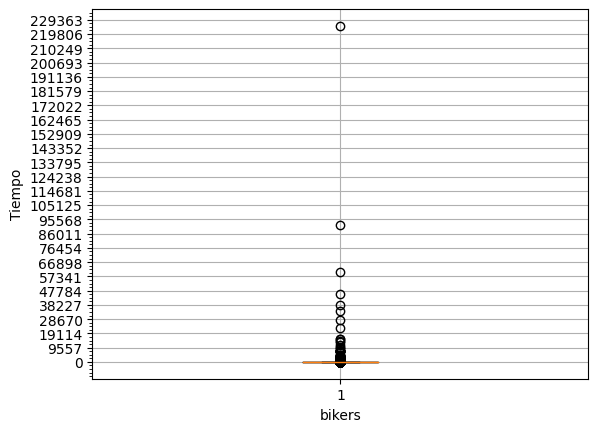

In [2]:
arreglo = np.array(df["duracion_recorrido"])
plt.grid(True)
plt.yticks(np.arange(0,len(df["duracion_recorrido"])+1000, len(df["duracion_recorrido"])/300))
plt.boxplot(arreglo)
plt.ylabel("Tiempo")
plt.xlabel("bikers")
plt.minorticks_on()
plt.show()

#todos los circulos que aparecen con fondo blanco alejados pueden considerarse anomalos
#la linea naranja nos indica la media, por lo cual intentaremos dejar solo los datos mas cercanos a ella

###  <span style ="color:pink; background:black">Verificamos en el dataframe aquellas filas de la columna "duracion-recorrido", en donde el resultado supera los 240 minutos, equivalentes a (4hs), lo que consideramos un tiempo maximo razonable
 </span>

In [3]:
df[df["duracion_recorrido"] > 240]

,Unnamed: 0,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta
1,1,13103015BAEcobici,253,2021-12-26 19:41:40 UTC,61BAEcobici,098 - AV. ALVAREZ JONTE Y BENITO JUAREZ,Benito Juarez 2205,-58.504663,-34.618809,2021-12-26 23:54:57 UTC,453BAEcobici,028 - Plaza de la Bandera,Av. Gaona 5181,-58.494485,-34.629480,807815BAEcobici,FIT
122,122,12882412BAEcobici,327,2021-12-04 10:43:27 UTC,46BAEcobici,046 - Chile,"Calle Perú, 718",-58.374375,-34.616301,2021-12-04 16:11:10 UTC,196BAEcobici,196 - HOSPITAL ARGERICH,750 Pi Y Margall & Necochea,-58.365721,-34.627535,69288BAEcobici,FIT
328,328,13015446BAEcobici,804,2021-12-16 22:46:17 UTC,33BAEcobici,033 - Facultad de Medicina,Pres. José Evaristo Uriburu 987,-58.398981,-34.597091,2021-12-17 12:10:43 UTC,220BAEcobici,097 - Avelino Diaz,Avelino Diaz&Doblas,-58.427573,-34.635128,808409BAEcobici,ICONIC
1853,1853,13039802BAEcobici,259,2021-12-19 20:58:34 UTC,248BAEcobici,346 - Plaza Zapiola,2001 Donado,-58.474635,-34.573522,2021-12-20 01:17:48 UTC,248BAEcobici,346 - Plaza Zapiola,2001 Donado,-58.474635,-34.573522,770954BAEcobici,FIT
2282,2282,13016828BAEcobici,616,2021-12-17 04:04:59 UTC,58BAEcobici,058 - Ministro Carranza,Santa Fe Av. & Dorrego,-58.434688,-34.575277,2021-12-17 14:21:50 UTC,269BAEcobici,260 - SAN MIGUEL DE GARICOITS,"Delgado & Loreto, Virrey",-58.457799,-34.577329,776377BAEcobici,ICONIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2892575,2892575,11125176BAEcobici,709,2021-05-20 08:37:57 UTC,449BAEcobici,352 - San Jose de Flores,Avenida Rivadavia y Fray Cayetano,-58.463251,-34.629083,2021-05-20 20:26:58 UTC,335BAEcobici,206 - Galicia,2502 Galicia,-58.470980,-34.615945,573916BAEcobici,ICONIC
2892745,2892745,12813966BAEcobici,343,2021-11-29 14:08:48 UTC,449BAEcobici,352 - San Jose de Flores,Avenida Rivadavia y Fray Cayetano,-58.463251,-34.629083,2021-11-29 19:52:43 UTC,449BAEcobici,352 - San Jose de Flores,Avenida Rivadavia y Fray Cayetano,-58.463251,-34.629083,814565BAEcobici,ICONIC
2893293,2893293,10549180BAEcobici,415,2021-03-18 07:45:28 UTC,449BAEcobici,352 - San Jose de Flores,Avenida Rivadavia y Fray Cayetano,-58.463251,-34.629083,2021-03-18 14:40:49 UTC,372BAEcobici,322 - MARTÍ Y DIRECTORIO,"404 Marti, Jose",-58.470136,-34.636406,644544BAEcobici,ICONIC
2894722,2894722,12158040BAEcobici,349,2021-09-28 12:26:47 UTC,449BAEcobici,352 - San Jose de Flores,Avenida Rivadavia y Fray Cayetano,-58.463251,-34.629083,2021-09-28 18:15:47 UTC,104BAEcobici,104 - Federico Lacroze,Av. Guzman 1100 & Av. Corrientes,-58.455212,-34.587617,754731BAEcobici,FIT


###  <span style ="color:pink; background:black">Se decide filtrar los datos eliminando las filas que tienen una duración de recorrido mayor a 240 minutos(4hs). Dado que se encontraron mas de mil datos atípicos que interferian en un correcto analisis de los datos. Y por ultimo creamos un nuevo DATAFRAME con los datos ya filtrados</span>

In [4]:
#filtrando los datos de df e ingresandolos en un nuevo dataframe "recorrido"
recorrido = pd.DataFrame(df[df["duracion_recorrido"] <= 240])
#modificando los indices ya que al borrar algunas filas con duracion mayor a 240min, los indices no seguian un orden numerico
recorrido.index = range(0,len(recorrido))
#borrando una columna con datos innecesarios
recorrido.drop(['Unnamed: 0'], axis = 1, inplace= True)

recorrido

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta
0,13103591BAEcobici,22,2021-12-26 22:38:46 UTC,54BAEcobici,054 - Acuña de Figueroa,Lavalle 4015,-58.422069,-34.598210,2021-12-26 23:01:24 UTC,64BAEcobici,064 - RIOBAMBA,Riobamba 1264 & Juncal,-58.394109,-34.593651,81924BAEcobici,FIT
1,13100479BAEcobici,25,2021-12-26 11:04:50 UTC,111BAEcobici,111 - MACACHA GUEMES,Machaca Guemes 350,-58.364686,-34.605488,2021-12-26 11:30:38 UTC,79BAEcobici,079 - AZUCENA VILLAFLOR,"Villaflor, Azucena & Dealessi, Pierina",-58.363930,-34.611890,563474BAEcobici,FIT
2,13103730BAEcobici,2,2021-12-26 23:27:17 UTC,111BAEcobici,111 - MACACHA GUEMES,Machaca Guemes 350,-58.364686,-34.605488,2021-12-26 23:30:10 UTC,111BAEcobici,111 - MACACHA GUEMES,Machaca Guemes 350,-58.364686,-34.605488,686078BAEcobici,FIT
3,13103019BAEcobici,32,2021-12-26 19:42:22 UTC,134BAEcobici,134 - SOLDADO DE LA FRONTERA,Soldado de la Frontera 4999,-58.465900,-34.682940,2021-12-26 20:14:53 UTC,134BAEcobici,134 - SOLDADO DE LA FRONTERA,Soldado de la Frontera 4999,-58.465900,-34.682940,445798BAEcobici,ICONIC
4,13103542BAEcobici,25,2021-12-26 22:25:30 UTC,151BAEcobici,151 - AIME PAINÉ,"Villaflor, Azucena & Paine, Aime",-58.361285,-34.611815,2021-12-26 22:51:07 UTC,91BAEcobici,091 - Pasco,708 Pasco & Chile,-58.397602,-34.617448,780336BAEcobici,ICONIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865608,11943650BAEcobici,9,2021-09-05 01:44:00 UTC,449BAEcobici,352 - San Jose de Flores,Avenida Rivadavia y Fray Cayetano,-58.463251,-34.629083,2021-09-05 01:53:26 UTC,280BAEcobici,222 - SIMON BOLIVAR,"1701 Fernandez Moreno, Baldomero",-58.449379,-34.633528,712574BAEcobici,ICONIC
2865609,11944836BAEcobici,27,2021-09-05 11:55:27 UTC,449BAEcobici,352 - San Jose de Flores,Avenida Rivadavia y Fray Cayetano,-58.463251,-34.629083,2021-09-05 12:22:47 UTC,254BAEcobici,276 - PRIMERA JUNTA,Av. Rivadavia & Del Barco Centenera,-58.441607,-34.620717,582554BAEcobici,ICONIC
2865610,11945100BAEcobici,46,2021-09-05 12:39:36 UTC,449BAEcobici,352 - San Jose de Flores,Avenida Rivadavia y Fray Cayetano,-58.463251,-34.629083,2021-09-05 13:26:23 UTC,449BAEcobici,352 - San Jose de Flores,Avenida Rivadavia y Fray Cayetano,-58.463251,-34.629083,447870BAEcobici,ICONIC
2865611,11945164BAEcobici,22,2021-09-05 12:53:02 UTC,449BAEcobici,352 - San Jose de Flores,Avenida Rivadavia y Fray Cayetano,-58.463251,-34.629083,2021-09-05 13:15:33 UTC,82BAEcobici,082 - HOSPITAL ITALIANO,394 Rawson & Potosi,-58.426395,-34.607892,751061BAEcobici,ICONIC


###  <span style ="color:pink; background:black">Graficamos nuevamente con "Boxplot" para verificar si quedó algun dato anomalo </span>

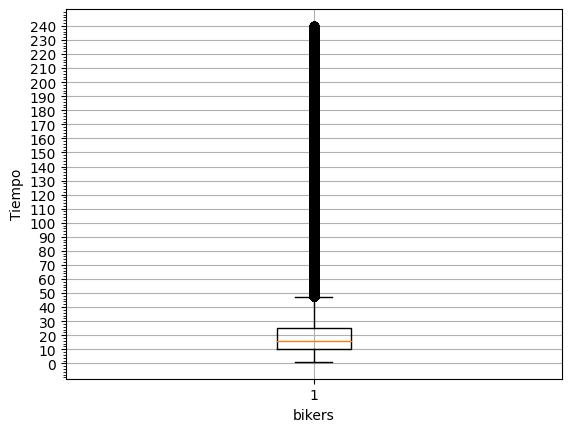

In [7]:
arreglo2 = np.array(recorrido["duracion_recorrido"])
plt.grid(True)
plt.yticks(np.arange(0,241, 10))
plt.boxplot(arreglo2)
plt.ylabel("Tiempo")
plt.xlabel("bikers")
plt.minorticks_on()
plt.show()

# <span style ="color:black; background:orange"> Ahora procedemos a crear graficos que muestren la mediana, el minimo, el maximo y el promedio de la duración del recorrido, utilizando las librerias seaborn y matplotlib</span>

### <span style ="color:pink; background:black">Grafico con Saborn</span>


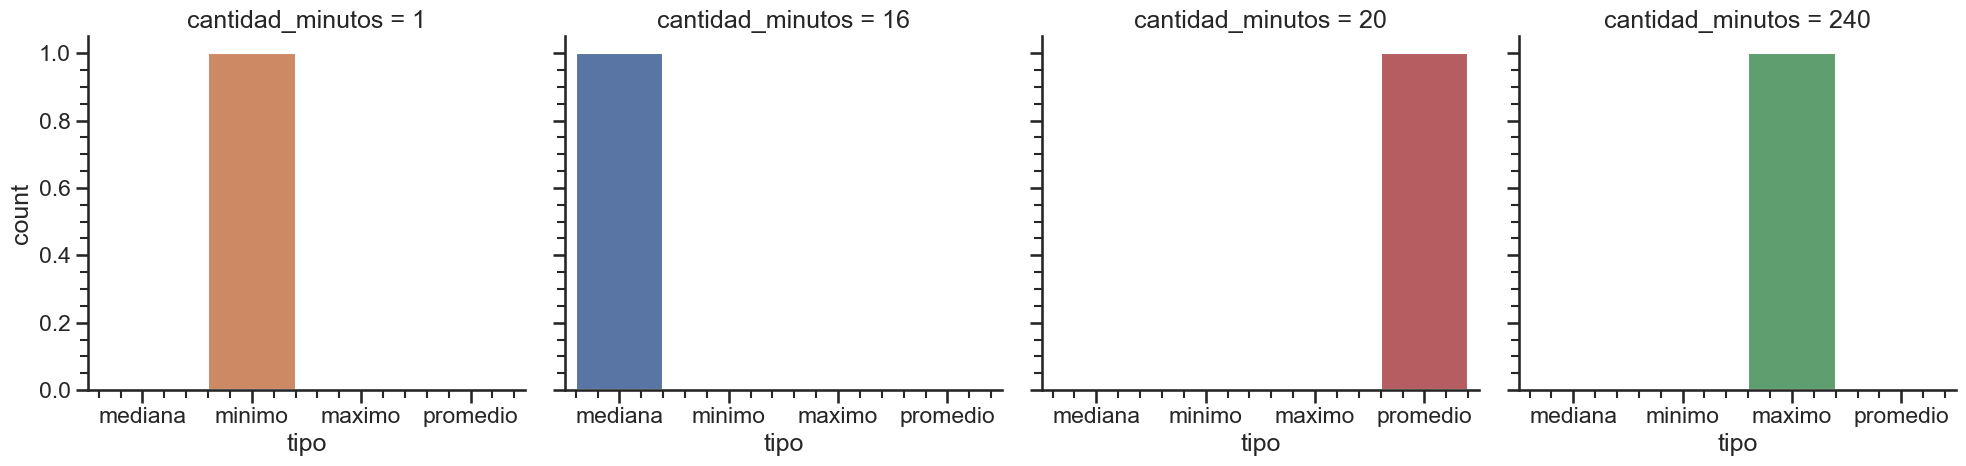

In [37]:
#Creamos un nuevo DataFrame con los valores que queremos visualizar
me= round(recorrido["duracion_recorrido"].median())
mini=round(recorrido["duracion_recorrido"].min())
maxi=round(recorrido["duracion_recorrido"].max())
prom=round(recorrido["duracion_recorrido"].mean())

indice= [me,mini,maxi,prom]
val = ["mediana", "minimo","maximo", "promedio"]

valores= pd.DataFrame(indice, columns= ["cantidad_minutos"])
valores["tipo"] = val

#Procedemos a Graficar
g = sns.catplot(x="tipo", data=valores, kind="count", col= "cantidad_minutos")
sns.set_theme(style="ticks", context="talk")
plt.minorticks_on()

plt.show()

### <span style ="color:pink; background:black">Grafico con matplotlib</span>


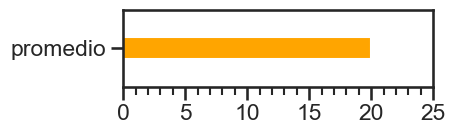

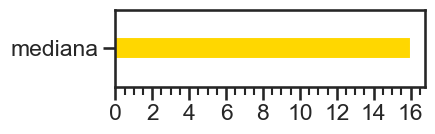

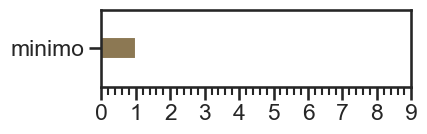

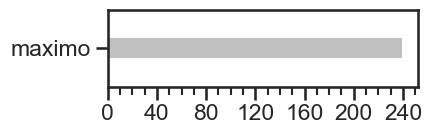

In [36]:
#creamos 4 variables para almacenar los datos
mediana = pd.DataFrame(round(recorrido["duracion_recorrido"].median()), index = ["mediana"] , columns= ["mediana"])
minimo = pd.DataFrame(round(recorrido["duracion_recorrido"].min()), index = ["minimo"] , columns= ["minimo"] )
maximo = pd.DataFrame(round(recorrido["duracion_recorrido"].max()), index =  ["maximo"] , columns= ["maximo"] )
promedio = pd.DataFrame(round(recorrido["duracion_recorrido"].mean()), index =["promedio"]  , columns=["promedio"] )

#procedemos a graficar
sns.set_theme(style="ticks", context="talk") 
p = promedio.plot(kind="barh", width= 0.2,color ='orange',figsize=(4,1))
m = mediana.plot(kind="barh", width= 0.2,color ='#FFD700',figsize=(4,1))
mi= minimo.plot(kind="barh", width= 0.2,color ='#8C7853',figsize=(4,1))
ma = maximo.plot(kind="barh", width= 0.2,color ='#C0C0C0',figsize=(4,1))


p.get_legend().remove()
m.get_legend().remove()
mi.get_legend().remove()
ma.get_legend().remove()

p.minorticks_on()
m.minorticks_on()
mi.minorticks_on()
ma.minorticks_on()

p.set(xticks=np.arange(0,26,5))
m.set(xticks=np.arange(0,17,2))
mi.set(xticks=np.arange(0,10,1))
ma.set(xticks=np.arange(0,241,40))


plt.show()

# <span style ="color:black; background:orange"> Por ultimo creamos graficos para visualizar otros datos relevantes sobre el recorrido</span>


### <span style ="color:pink; background:black">Se decide crear una función que devuelva indices aleatorios segun la cantidad ingresada por el usuario con la intencion de visualizar los datos con una muestra del total, ya que por cuestiones de memoria y tiempo tardaria demasiado visualizar millones de datos como los que tenemos 
</span>

In [5]:
''' EJECUTAR ESTA CELDA TODAS LAS VECES QUE SEA NECESARIO.
PROBAR DISINTOS DATOS ALEATORIOS Y ASI VISUALIZAR DIFERENTES GRAFICAS'''

dfBicis = pd.DataFrame()
valores = []
#funcion que itera en el rango de la cantidad de datos que ingresa el usuario y indices aleatorios en el rango de la cantidad de filas 
def extraerDatos(cant):
    for i in range(cant):
        valores.append(random.randint(0,2865614))
cantidad = int(input("Ingrese el total de valores con los que quiere visualizar los datos: "))
extraerDatos(cantidad)
dfBicis = recorrido.iloc[valores]
dfBicis


Ingrese el total de valores con los que quiere visualizar los datos: 80


,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta
2079204,11873004BAEcobici,22,2021-08-27 20:00:44 UTC,131BAEcobici,131- HOSPITAL DE CLÍNICAS,"Uriburu Jose E., Pres. & Paraguay",-58.399016,-34.598404,2021-08-27 20:23:35 UTC,210BAEcobici,335 - General Urquiza,Figueroa Alcorta & Sarmiento,-58.411278,-34.572165,83471BAEcobici,FIT
2260379,12258900BAEcobici,6,2021-10-08 11:30:29 UTC,174BAEcobici,174 - MINISTERIO DE EDUCACION,Marcelo T. de Alvear & Rodriguez Peña,-58.391768,-34.597225,2021-10-08 11:36:30 UTC,38BAEcobici,038 - Plaza Libertad,Cerrito 990 y Av. Marcelo T. De Alvear,-58.382840,-34.597050,269540BAEcobici,FIT
2143409,10808305BAEcobici,2,2021-04-15 19:03:42 UTC,156BAEcobici,156 - Plaza Alemania,2939 Cavia,-58.407470,-34.577590,2021-04-15 19:06:03 UTC,156BAEcobici,156 - Plaza Alemania,2939 Cavia,-58.407470,-34.577590,330424BAEcobici,ICONIC
1737238,11194167BAEcobici,31,2021-06-01 14:42:32 UTC,65BAEcobici,065 - Julián Álvarez,3822 Guemes,-58.415787,-34.587312,2021-06-01 15:13:45 UTC,76BAEcobici,076 - Ayacucho,"Ayacucho &Peron, Juan Domingo, Tte. General",-58.395055,-34.607408,675236BAEcobici,ICONIC
637982,11331050BAEcobici,27,2021-06-18 15:10:06 UTC,6BAEcobici,006 - Parque Lezama,"Avenida Martin Garcia, 295",-58.369758,-34.628526,2021-06-18 15:37:50 UTC,4BAEcobici,004 - Plaza Roma,Lavalle & Bouchard,-58.368781,-34.601822,226284BAEcobici,ICONIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286710,10549132BAEcobici,17,2021-03-18 07:39:05 UTC,361BAEcobici,258 - Plaza J.J. Paso,1399 Moldes,-58.453608,-34.569187,2021-03-18 07:56:49 UTC,277BAEcobici,292 - PLAZA BOLIVIA,Olleros Av. & Del Libertador Av.,-58.436115,-34.563539,325463BAEcobici,ICONIC
2746244,11799897BAEcobici,25,2021-08-20 18:07:46 UTC,277BAEcobici,292 - PLAZA BOLIVIA,Olleros Av. & Del Libertador Av.,-58.436115,-34.563539,2021-08-20 18:33:01 UTC,215BAEcobici,113 - Guatemala,Guatemala 4773,-58.424996,-34.585878,770840BAEcobici,ICONIC
2781769,10565028BAEcobici,33,2021-03-19 13:07:25 UTC,289BAEcobici,255 - BARRANCAS DE BELGRANO,"Sucre, Antonio Jose De, Mcal. Y Vertiz Virrey Av.",-58.448314,-34.559801,2021-03-19 13:40:55 UTC,43BAEcobici,334 - CENTRO DE EXPOSICIONES,2133 Figueroa Alcorta,-58.389921,-34.584018,678403BAEcobici,ICONIC
600741,11783920BAEcobici,6,2021-08-19 12:58:46 UTC,155BAEcobici,155 - Parque José Evaristo Uriburu,300 Almafuerte Av. & Los Patos,-58.412408,-34.641170,2021-08-19 13:05:27 UTC,424BAEcobici,387 - Luna,201 Luna,-58.399650,-34.638584,443383BAEcobici,ICONIC


### <span style ="color:pink; background:black"> Analisis de la duracion en minutos de los viajes en bicicleta<br> Utilizando las librerias Seaborn y matplotlib</span>


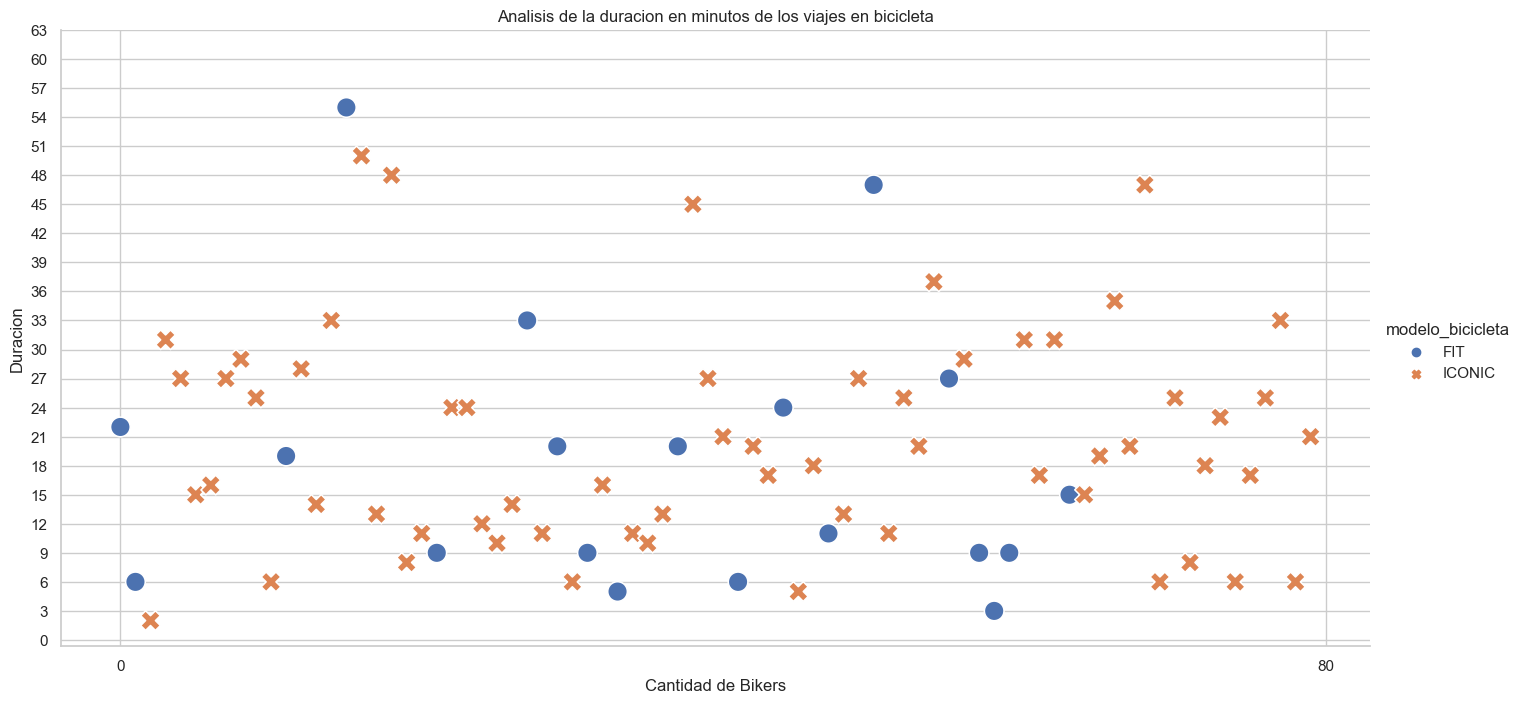

In [38]:
import numpy as np
sns.set_theme(style="whitegrid", context="notebook")
disper = sns.relplot(data = dfBicis,
                x= np.arange(0,cantidad,1),
                y="duracion_recorrido",
                s=200,
                height=7,
                aspect=2,
                hue="modelo_bicicleta",
                style="modelo_bicicleta")

plt.grid()
disper.set(title="Analisis de la duracion en minutos de los viajes en bicicleta")
disper.set(xlabel="Cantidad de Bikers")
disper.set(ylabel="Duracion")
plt.grid()
disper.set(yticks = np.arange(0,dfBicis["duracion_recorrido"].max()+10, dfBicis["duracion_recorrido"].max()/dfBicis["duracion_recorrido"].max()+2))
disper.set(xticks = np.arange(0,cantidad+1, cantidad))
plt.minorticks_on()
plt.show()

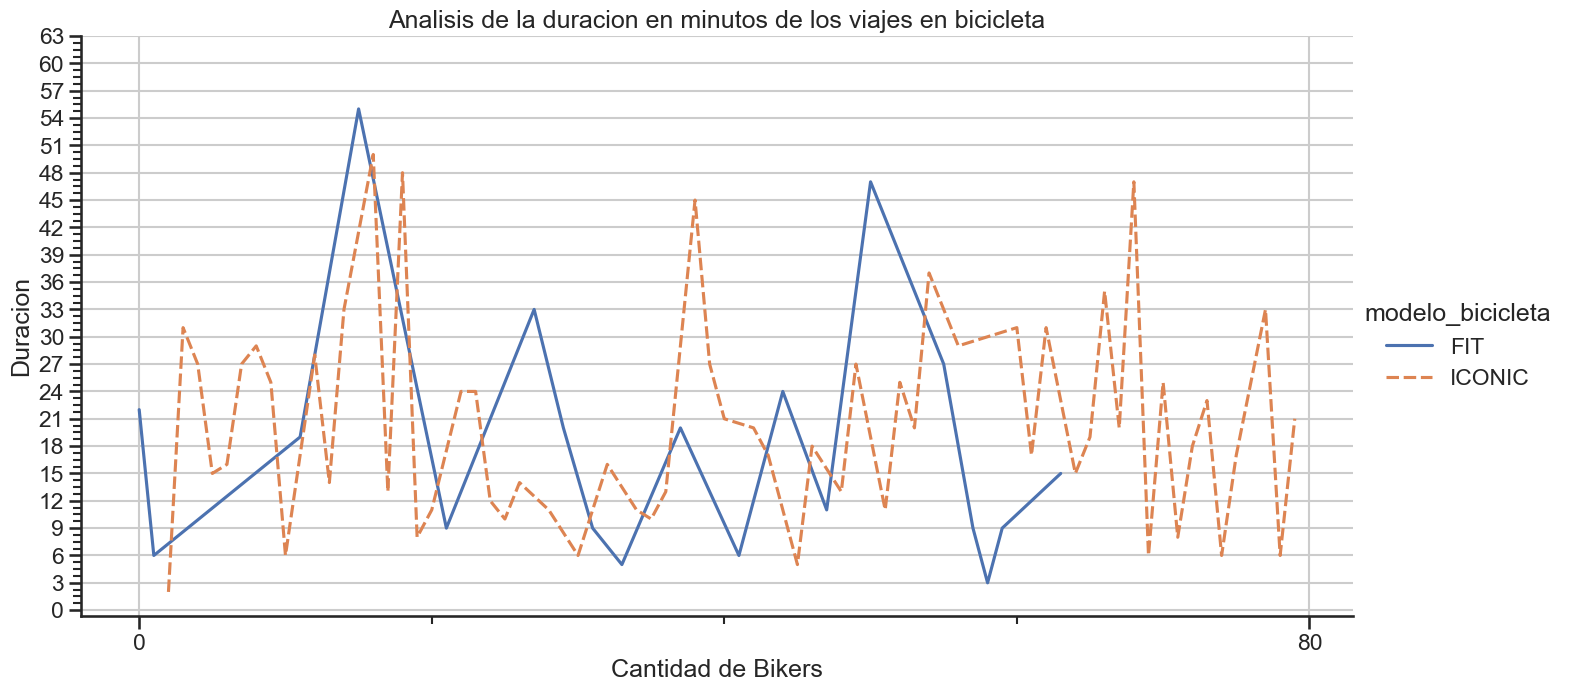

In [24]:
import numpy as np
sns.set_theme(style="ticks", context="talk")
lineal = sns.relplot(data=dfBicis,
                     x= np.arange(0,cantidad,1),
                     y="duracion_recorrido", 
                     kind= "line",
                     height=7,
                     aspect=2,
                     hue="modelo_bicicleta",
                     style="modelo_bicicleta",
                     errorbar="sd")
lineal.set(title="Analisis de la duracion en minutos de los viajes en bicicleta")
sns.set_theme(style="darkgrid", context="talk")
lineal.set(xlabel="Cantidad de Bikers")
lineal.set(ylabel="Duracion")
lineal.set(yticks = np.arange(0,dfBicis["duracion_recorrido"].max()+10, dfBicis["duracion_recorrido"].max()/dfBicis["duracion_recorrido"].max()+2))
lineal.set(xticks = np.arange(0,cantidad+1, cantidad))
plt.minorticks_on()
plt.grid()

plt.show()

